In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
import nltk
import numpy as np
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [30]:
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 100000

In [31]:
factiva = pd.read_csv("data/FACTIVA_FINAL.csv")

In [32]:
# Remove columns with index
factiva1 = factiva.loc[:, ~factiva.columns.str.contains('^Unnamed')].copy() 
# always use .copy() when making deep copies of pandas df!

In [33]:
# Filter news tickers because DA is only mentioned once in chronology of events
factiva1_1 = factiva1[~factiva1['title'].str.contains("Newsblog|Ticker|Auf einen Blick|REG_K\n")].copy()
print("Number of removed articles:",len(factiva1)-len(factiva1_1))
factiva1_2 = factiva1_1[~factiva1_1['body'].str.contains('News-Ticker')].copy()
print("Number of removed articles:",len(factiva1_1)-len(factiva1_2))
# Remove Dschungelcamp ticker describing events in a given episode because DA is only briefly mentioned
factiva2 = factiva1_2[~factiva1_2['body'].str.contains('Dschungelcamp')].copy()
print("Number of removed articles:",len(factiva1_2)-len(factiva2))

Number of removed articles: 13
Number of removed articles: 9
Number of removed articles: 1


In [34]:
print("Amount of articles:", len(factiva2))
print("Amount of articles to be labelled:", round(len(factiva2)*0.2))
print("Average length of articles:", factiva2.body.str.len().mean().round())
print("Median length of articles:", factiva2.body.str.len().median())
print("Length of longest article:", factiva2.body.str.len().max())
print("Length of shortest article:", factiva2.body.str.len().min())

Amount of articles: 2564
Amount of articles to be labelled: 513
Average length of articles: 3089.0
Median length of articles: 2242.0
Length of longest article: 18168
Length of shortest article: 89


Average reading time for 2500 words is: 8.33 . 
 For 512.8000000000001 , articles, we need 72.19 hours.


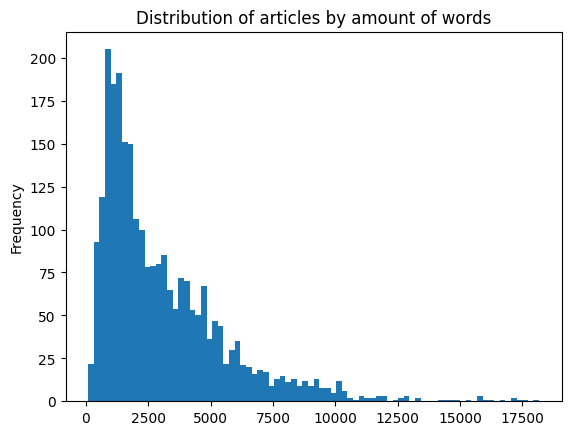

In [35]:
factiva2.body.str.len().plot.hist(bins = 80, title = 'Distribution of articles by amount of words')
avg_article_len = 2500
print("Average reading time for",avg_article_len,"words is:",round(avg_article_len/300, 2),". \n For",len(factiva2)*0.2,", articles, we need",round(520*round(avg_article_len/300, 2)/60, 2), "hours.")

In [ ]:
print("Number of newspapers in this dataset:", factiva2['newspaper'].nunique(), "\n")
print("Number of articles by newspaper:\n", factiva2.groupby('newspaper').size().sort_values(ascending=False))

In [50]:
# before saving you should lowercase corpus (article body only)!
# you can also include this step in 'preprocess_articles.py' 
factiva2["body"] = factiva2["body"].map(str.lower)

# visual check to see it works
print(factiva2["body"][5])

['mit stark blutenden stich- und schnittverletzungen ist ein 29 jahre alter mann auf einem gehweg in berlin-schöneberg gefunden worden. ein passant rief am dienstagabend nach 23.00 uhr rettungskräfte zur ecke kurmärkische straße/zietenstraße, wie die polizei am mittwoch mitteilte. zum stand der bisherigen ermittlungen hieß es, dass der 29-jährige mit dem ex-mann seiner schwester in einer wohnung in der nähe des fundorts in streit geraten sein soll.', 'dabei habe ihm der 38 jahre alte, ehemalige schwager die verletzungen mit einem messer zugefügt. diser soll dann die wohnung verlassen haben. die polizei ermittelt wegen gefährlicher körperverletzung und zu der frage, wo sich der gesuchte aufhält. die verletzungen des 29-jährigen wurden in einem krankenhaus versorgt. worum es bei dem streit ging, teilte die polizei nicht mit.']


In [54]:
# turn back to list for processing
title = factiva2['title'].tolist()
body = factiva2['body'].tolist()
date = factiva2['date'].tolist()
newspaper = factiva2['newspaper'].tolist()

factiva_export = [title, body, date, newspaper]

### Suggested edits for saving & loading data:

In [14]:
# with open("data/factiva_export.pkl", "wb") as f:
#    pickle.dump(factiva_export, f)

In [57]:
# better method for serialising large corpus
import json

# to dump the corpus
with open("data/factiva_data.json", 'w') as f:
    json.dump(factiva_export, f)

In [61]:
# visual check 
print(json.dumps(factiva_corpus[1], indent=2, skipkeys=True, separators=('\n', ',')))

# but what about the german accents? they will be fine when decoded!

[
  "['es gibt physische gewalt, es gibt psychische gewalt - und es gibt digitale gewalt. wie diese wirkt, wenn sie vom staat als waffe eingesetzt wird, das erkl\u00e4rten am samstag in berlin dissidenten und journalisten, die opfer der sp\u00e4hsoftware pegasus geworden sind: \u201ees ist, als s\u00e4\u00dfe jemand in deinem gehirn\u201c, sagte der anwalt mazen masri. \u201eunsere privatsph\u00e4re wurde zerst\u00f6rt\u201c, beschrieb es die mexikanische journalistin carmen aristegui. und der nsa-whistleblower edward snowden, per video zugeschaltet, warnte eindringlich vor der drohenden \u201eaussp\u00e4h-gesellschaft\u201c und vor der erosion der demokratie.', 'nicht nur aristegui und ihren kollegen, auch ihrem minderj\u00e4hrigen sohn wurde pegasus von staatlichen organen aufs handy gespielt. die software erlaubt nicht nur, unbemerkt s\u00e4mtliche daten des opfers abzugreifen und dessen gesamte kommunikation zu verfolgen, sondern auch, diesen mit kamera und mikrofon seines eigenen 

In [ ]:
# to load the corpus [run this in the next notebook]
# with open("data/factiva_data.json", 'r') as f:
#    factiva_corpus = json.load(f)